In [32]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets
import seaborn as sns
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from ucimlrepo import fetch_ucirepo 
import warnings

In [33]:
# fetch dataset 
heart_disease = fetch_ucirepo(id=45) 
  
# data (as pandas dataframes) 
X = heart_disease.data.features 
Y = heart_disease.data.targets 
  
# variable information 
#print(heart_disease.variables)

# Fill in any NaN values in the data to 0. 
X = X.fillna(0)

In [34]:
# Place into a DataFrame Table for processing data.
df_X = pd.DataFrame(X)
df_Y = pd.DataFrame(Y)

print(X.shape, Y.shape)
df_Y.head()

(303, 13) (303, 1)


,num
0,0
1,2
2,1
3,0
4,0


In [35]:
df = X.join(Y)
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0


In [36]:
df_0 = df[df['num'] == 0].copy()
df_1 = df[df['num'] == 1].copy()
df_2 = df[df['num'] == 2].copy()
df_3 = df[df['num'] == 3].copy()
df_4 = df[df['num'] == 4].copy()

In [37]:
train_df_0, test_df_0 = train_test_split(df_0, test_size=0.2, random_state=0)
train_df_1, test_df_1 = train_test_split(df_1, test_size=0.2, random_state=0)
train_df_2, test_df_2 = train_test_split(df_2, test_size=0.2, random_state=0)
train_df_3, test_df_3 = train_test_split(df_3, test_size=0.2, random_state=0)
train_df_4, test_df_4 = train_test_split(df_4, test_size=0.2, random_state=0)
print(train_df_0.shape, train_df_1.shape, train_df_2.shape, train_df_3.shape, train_df_4.shape)
print(test_df_0.shape, test_df_1.shape, test_df_2.shape, test_df_3.shape, test_df_4.shape)

(131, 14) (44, 14) (28, 14) (28, 14) (10, 14)
(33, 14) (11, 14) (8, 14) (7, 14) (3, 14)


In [38]:
train_df = pd.concat([train_df_0, train_df_1, train_df_2, train_df_3, train_df_4], axis=0)
test_df = pd.concat([test_df_0, test_df_1, test_df_2, test_df_3, test_df_4], axis=0)
print(train_df.shape, test_df.shape)

(241, 14) (62, 14)


In [39]:
X_train = train_df.values[:,0:12]
Y_train = train_df.values[:,13]
X_test = test_df.values[:,0:12]
Y_test = test_df.values[:,13]
print(Y_test.shape)

(62,)


In [40]:
sc_X = StandardScaler()
X_train_sc = sc_X.fit_transform(X_train)
X_test_sc = sc_X.fit_transform(X_test)
model = SVC(C=150, kernel='rbf', gamma=0.025)
model.fit(X_train_sc, Y_train)
predicted = model.predict(X_test_sc)
report = classification_report(Y_test, predicted)
print(report)

              precision    recall  f1-score   support

         0.0       0.74      0.85      0.79        33
         1.0       0.09      0.09      0.09        11
         2.0       0.40      0.25      0.31         8
         3.0       0.25      0.14      0.18         7
         4.0       0.25      0.33      0.29         3

    accuracy                           0.53        62
   macro avg       0.35      0.33      0.33        62
weighted avg       0.50      0.53      0.51        62



In [41]:
max_accuracy = 0
highest_C = 0
accuracy = []

C_values = range(1,500)
for C in C_values:
    sc_X = StandardScaler()
    X_train_sc = sc_X.fit_transform(X_train)
    X_test_sc = sc_X.fit_transform(X_test)
    model = SVC(C=C, kernel='rbf', gamma=0.025)
    model.fit(X_train_sc, Y_train)
    predicted = model.predict(X_test_sc)
    warnings.filterwarnings('ignore')
    report_data = classification_report(Y_test, predicted, output_dict=True)
    data = pd.DataFrame(report_data)
    accuracy.append(data.values[2,5])
    if data.values[2,5] > max_accuracy:
        report = classification_report(Y_test, predicted)
        highest_C = C
        max_accuracy = data.values[2,5]
        cm = confusion_matrix(Y_test, predicted)
        
print("The penalty parameter C, ", highest_C, "have the highest accuracy of ", max_accuracy)
print("Classification Report: \n", report)

The penalty parameter C,  1 have the highest accuracy of  0.6129032258064516
Classification Report: 
               precision    recall  f1-score   support

         0.0       0.71      0.97      0.82        33
         1.0       0.29      0.18      0.22        11
         2.0       1.00      0.25      0.40         8
         3.0       0.25      0.29      0.27         7
         4.0       0.00      0.00      0.00         3

    accuracy                           0.61        62
   macro avg       0.45      0.34      0.34        62
weighted avg       0.59      0.61      0.56        62



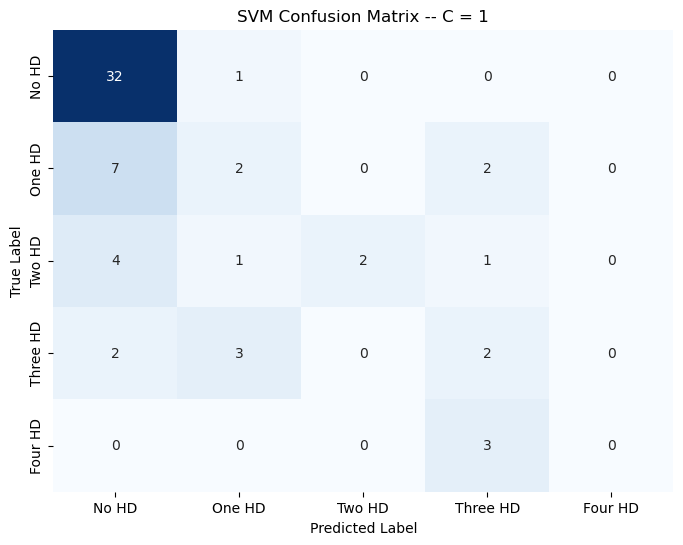

In [42]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False, 
            xticklabels=['No HD', 'One HD', 'Two HD', 'Three HD', 'Four HD'], 
            yticklabels=['No HD', 'One HD', 'Two HD', 'Three HD', 'Four HD'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('SVM Confusion Matrix -- C = 1')
plt.show()

Text(0.5, 1.0, 'Heart Disease Prediction Accuracy over Penalty C')

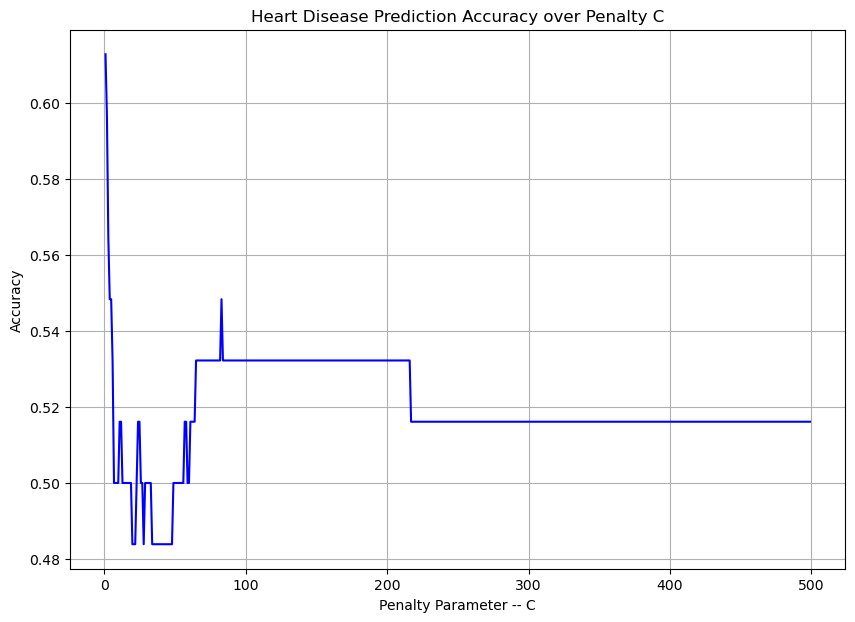

In [43]:
plt.figure(figsize=(10,7))
plt.plot(C_values, accuracy, color='b')
plt.grid()
plt.xlabel('Penalty Parameter -- C')
plt.ylabel('Accuracy')
plt.title('Heart Disease Prediction Accuracy over Penalty C')